<a href="https://colab.research.google.com/github/spandan-kumar/market-predection/blob/main/stock_market_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import yfinance as yf
nifty = yf.Ticker("^NSEI")
nifty = nifty.history(period="max")
nifty


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,0.0,0.0
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,0.0,0.0
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,0.0,0.0
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,0.0,0.0
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-12 00:00:00+05:30,18595.050781,18633.599609,18559.750000,18601.500000,179500,0.0,0.0
2023-06-13 00:00:00+05:30,18631.800781,18728.900391,18631.800781,18716.150391,233200,0.0,0.0
2023-06-14 00:00:00+05:30,18744.599609,18769.699219,18690.000000,18755.900391,261400,0.0,0.0


<Axes: xlabel='Date'>

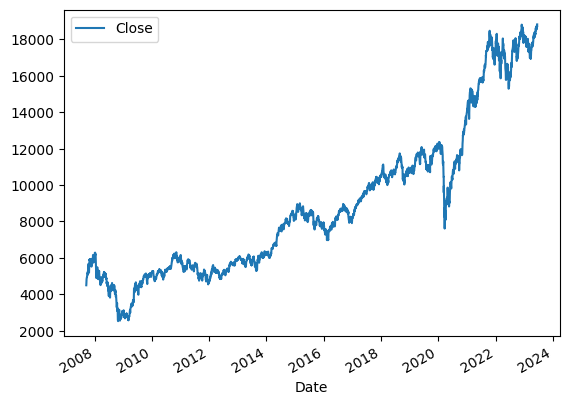

In [5]:
nifty.plot.line(y="Close", use_index = True)

In [6]:
del nifty["Dividends"]
del nifty["Stock Splits"]


In [7]:
nifty["Tomorrow"] = nifty["Close"].shift(-1)
nifty["Target"] = (nifty["Tomorrow"] > nifty["Close"]).astype(int)

In [8]:
nifty

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,4546.200195,1
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,4732.350098,1
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,4747.549805,1
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,4837.549805,1
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,4932.200195,1
...,...,...,...,...,...,...,...
2023-06-12 00:00:00+05:30,18595.050781,18633.599609,18559.750000,18601.500000,179500,18716.150391,1
2023-06-13 00:00:00+05:30,18631.800781,18728.900391,18631.800781,18716.150391,233200,18755.900391,1
2023-06-14 00:00:00+05:30,18744.599609,18769.699219,18690.000000,18755.900391,261400,18688.099609,0


In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000, min_samples_split=100, random_state=1)

train = nifty.iloc[:-100]
test = nifty.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=1000, random_state=1)

In [16]:
from sklearn.metrics import precision_score
import pandas as pd
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.5333333333333333

<Axes: xlabel='Date'>

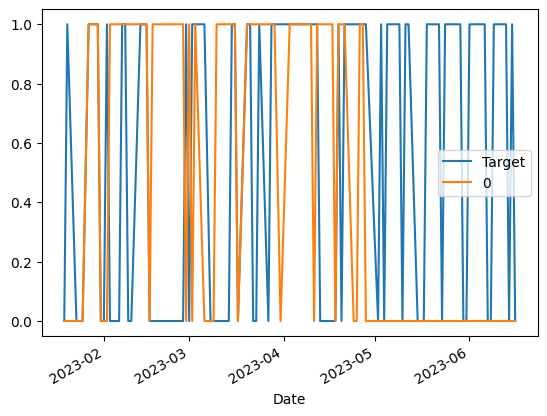

In [17]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [18]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [19]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [20]:
predictions = backtest(nifty, model, predictors)

In [21]:
predictions["Predictions"].value_counts()

1    780
0    580
Name: Predictions, dtype: int64

In [22]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5461538461538461

In [23]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.541912
0    0.458088
Name: Target, dtype: float64

In [26]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = nifty.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    nifty[ratio_column] = nifty["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    nifty[trend_column] = nifty.shift(1).rolling(horizon).sum()["Target"]

    new_predictors+= [ratio_column, trend_column]

In [27]:
nifty = nifty.dropna(subset=nifty.columns[nifty.columns != "Tomorrow"])

In [28]:
nifty


,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2011-10-13 00:00:00+05:30,5130.799805,5136.950195,5067.649902,5077.850098,0,5132.299805,1,0.997883,1.0,1.014789,3.0,0.992330,23.0,0.911365,111.0,1.042939,510.0
2011-10-14 00:00:00+05:30,5057.350098,5141.399902,5056.600098,5132.299805,0,5118.250000,0,1.005333,1.0,1.015754,3.0,1.004393,24.0,0.921801,111.0,1.053995,510.0
2011-10-17 00:00:00+05:30,5156.200195,5160.200195,5084.500000,5118.250000,0,5037.500000,0,0.998629,1.0,1.007444,2.0,1.003264,23.0,0.919921,111.0,1.051026,509.0
2011-10-18 00:00:00+05:30,5049.450195,5057.500000,5011.049805,5037.500000,0,5139.149902,1,0.992049,0.0,0.989091,2.0,0.989147,23.0,0.906187,110.0,1.034383,508.0
2011-10-19 00:00:00+05:30,5080.450195,5148.049805,5075.299805,5139.149902,0,5091.899902,0,1.009989,1.0,1.007477,2.0,1.010438,24.0,0.925163,111.0,1.055190,508.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-12 00:00:00+05:30,18595.050781,18633.599609,18559.750000,18601.500000,179500,18716.150391,1,1.001025,1.0,0.998740,3.0,1.038875,39.0,1.057508,137.0,1.268323,544.0
2023-06-13 00:00:00+05:30,18631.800781,18728.900391,18631.800781,18716.150391,233200,18755.900391,1,1.003072,2.0,1.003633,3.0,1.043653,40.0,1.063485,137.0,1.275550,544.0
2023-06-14 00:00:00+05:30,18744.599609,18769.699219,18690.000000,18755.900391,261400,18688.099609,0,1.001061,2.0,1.005446,3.0,1.044138,41.0,1.065125,138.0,1.277659,545.0


In [36]:
model = RandomForestClassifier(n_estimators=1000, min_samples_split=100, random_state=1)

In [37]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [38]:
predictions = backtest(nifty, model, new_predictors)

In [39]:
predictions["Predictions"].value_counts()

0.0    328
1.0     32
Name: Predictions, dtype: int64

In [40]:
precision_score(predictions["Target"], predictions["Predictions"])

0.59375

In [41]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.508333
0    0.491667
Name: Target, dtype: float64

In [42]:
predictions

,Target,Predictions
Date,,
2022-01-04 00:00:00+05:30,1,1.0
2022-01-05 00:00:00+05:30,0,0.0
2022-01-06 00:00:00+05:30,1,0.0
2022-01-07 00:00:00+05:30,1,0.0
2022-01-10 00:00:00+05:30,1,0.0
...,...,...
2023-06-12 00:00:00+05:30,1,0.0
2023-06-13 00:00:00+05:30,1,0.0
2023-06-14 00:00:00+05:30,0,0.0
